# Malware & AI (Project Skeleton)
## School of Cybersecurity, Korea University
## 2023-1

<hr>

## Binary File Data

In [1]:
# Data directories
benign_dir = "../binfiles/benignware"
malware_dir = "../binfiles/malware"

import os
import numpy

# function for directory listing
def get_training_paths(directory):
    targets = []
    for path in os.listdir(directory):
        targets.append(os.path.join(directory,path))
    return targets

malware_paths = get_training_paths(malware_dir)
benign_paths = get_training_paths(benign_dir)

print("Files found: {0} malware, {1} benignware".format(len(malware_paths), len(benign_paths)))


Files found: 428 malware, 991 benignware


## Read bytes from the files

In [2]:
import numpy as np

bytes_to_get = 1000

X_malware = np.zeros((len(malware_paths), bytes_to_get), dtype=numpy.uint8)
X_benign = np.zeros((len(benign_paths), bytes_to_get), dtype=numpy.uint8)

for i, exe_path in enumerate(malware_paths):
    data = np.fromfile(exe_path, dtype=np.uint8)
    if(data.size >= bytes_to_get):
        data = data[:bytes_to_get]
    X_malware[i,:data.size] = data

for i, exe_path in enumerate(benign_paths):
    data = np.fromfile(exe_path, dtype=np.uint8)
    if(data.size >= bytes_to_get):
        data = data[:bytes_to_get]
    X_benign[i,:data.size] = data


In [3]:
X = np.vstack((X_malware, X_benign))
y = np.hstack( (np.ones(len(malware_paths)),np.zeros(len(benign_paths)) ) )

In [4]:
X

array([[ 77,  90, 144, ...,   0,   0,   0],
       [ 77,  90, 144, ...,   0,   0,   0],
       [ 77,  90, 144, ...,   0,   0,   0],
       ...,
       [ 77,  90, 144, ...,   0,   0,   0],
       [ 77,  90, 144, ...,   0,   0,   0],
       [ 77,  90, 144, ...,   0,   0,   0]], dtype=uint8)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

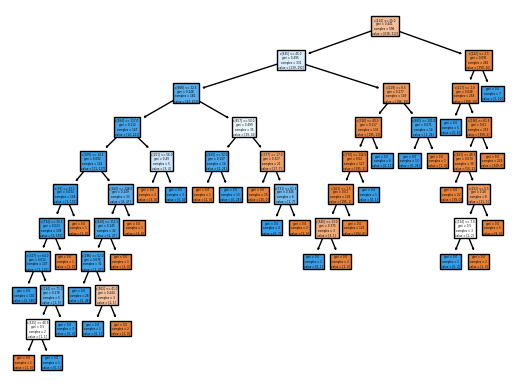

In [20]:
from sklearn import tree
_ = tree.plot_tree(rf.estimators_[0], filled=True)

In [21]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.976545842217484


In [22]:
a = rf.feature_importances_

In [23]:
topk_idx = sorted(range(len(a)), key=lambda i: a[i], reverse=True)[:5]

In [24]:
print(topk_idx)
print([hex(v) for v in topk_idx])

[619, 659, 656, 616, 652]
['0x26b', '0x293', '0x290', '0x268', '0x28c']
